# ROC Curve

#### Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

claimants=pd.read_csv("C:/16-logistic_regression/claimants.csv")

#The 0th column is CASENUM which is not useful,hence drop the column
c1=claimants.drop('CASENUM',axis=1)
c1.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [3]:
c1.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


#### let us check the null values

In [4]:
c1.isna().sum()

# There are several null values around 290

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

#### Let us use mean imputation for continuous data and mode imputation for discrete data

In [5]:
mean_value = c1.CLMAGE.mean()
mean_value

28.414422241529106

In [6]:
c1.CLMAGE = c1.CLMAGE.fillna(mean_value)
c1.CLMAGE.isna().sum()

0

#### For descrete value like CLMSEX we nedd to use mode imputation

In [7]:
mode_CLMSEX = c1.CLMSEX.mode()
mode_CLMSEX

0    1.0
Name: CLMSEX, dtype: float64

In [8]:
# Here if you will observe the output it is 0 1 i.e. 
# mode_CLMSEX[0] = 0, mode_CLMSEX[1], we are passing mode_CLMSEX[0]

In [9]:
c1.CLMSEX = c1.CLMSEX.fillna((mode_CLMSEX)[0])

In [10]:
c1.CLMSEX.isna().sum()

0

#### CLMINSUR

In [11]:
mode_INSUR = c1['CLMINSUR'].mode()
mode_INSUR

0    1.0
Name: CLMINSUR, dtype: float64

In [12]:
c1.CLMINSUR = c1.CLMINSUR.fillna((mode_INSUR)[0])
c1.CLMINSUR.isna().sum()

0

#### Seat Belt

In [13]:
mode_SB = c1['SEATBELT'].mode()
mode_SB

0    0.0
Name: SEATBELT, dtype: float64

In [14]:
c1.SEATBELT = c1.SEATBELT.fillna((mode_SB)[0])
c1.SEATBELT.isna().sum()

0

### Model Building

In [15]:
logit_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT', data=c1).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.1209
Time:                        15:15:40   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
==============================================================================
"""

In [16]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: ATTORNEY         Pseudo R-squared: 0.121     
Date:               2025-01-23 15:15 AIC:              1644.4709 
No. Observations:   1340             BIC:              1675.6734 
Df Model:           5                Log-Likelihood:   -816.24   
Df Residuals:       1334             LL-Null:          -928.48   
Converged:          1.0000           LLR p-value:      1.6204e-46
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.1493    0.2260   -0.6604  0.5090  -0.5922   0.2937
CLMAGE        0.0066    0.0032    2.0583  0.0396   0.0003   0.0128
LOSS         -0.3228    0.0294  -10.9615  0.0000  -0.3805  -0.2651
CLMINSUR      0.5284    0.2100    2.5159  0.0119   0.1168   0.9400
CLMSEX        0.3204    0.1198    2.6736  0.0075   0.0855   0.5552
SEATBELT     -0.6718    0.5224   -1.2860  0.1984  -1.6958   0.3521
=================================================================

"""

In [17]:
# Let us go for prediction
pred = logit_model.predict(c1.iloc[:,1:])
pred

0       0.000026
1       0.500422
2       0.575767
3       0.474743
4       0.637341
          ...   
1335    0.593816
1336    0.451543
1337    0.715776
1338    0.309620
1339    0.662483
Length: 1340, dtype: float64

### To derive ROC curve

ROC curve has trp on y-axis and fpr on x-axis, ideally, trp must be high, fpr must be low

In [18]:
fpr, tpr, thresholds = roc_curve(c1.ATTORNEY, pred)

In [19]:
# To identify optimum threshold

In [20]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5294418043694739

0.52944, by default you can take 0.5 value as a threshold.

Now we want to identify if new value is given to the model, it will fall in which region 0 or 1, for that we need to derive ROC curve

### To draw ROC curve

In [21]:
import pylab as pl
i = np.arange(len(tpr))
roc = pd.DataFrame({
    'fpr':pd.Series(fpr, index=i),
    'tpr': pd.Series (tpr,index = i),
    '1-fpr':pd.Series(1-fpr, index=i),
    'tf': pd.Series(tpr-(1-fpr),index = i),
    'thresholds': pd.Series(thresholds,index=i)
})

This code creates a DataFrame called roc using Pandas (pd).
    
It organizes various metrics related to teh Receiver Operating Characteristics into columns.

Each column represents a specific metric, and the row are index

### Plot ROC curve

Text(0, 0.5, 'True positive rate')

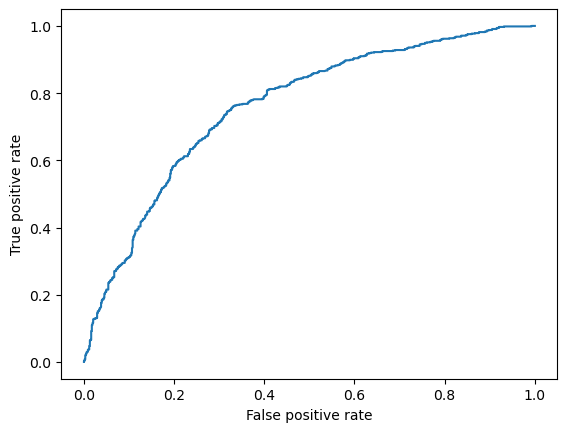

In [22]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [23]:
roc_auc = auc(fpr,tpr)

In [24]:
print("Area under the curve %f"%roc_auc)

Area under the curve 0.760101


### Now let us add prediction column in DataFrame

In [25]:
c1["pred"] = np.zeros(1340)

In [26]:
c1.loc[pred>optimal_threshold, "pred"]=1

if predicted value is greater than optimal threshold then change pred column

### Classification Report

In [27]:
classification = classification_report(c1["pred"],c1["ATTORNEY"])
classification

'              precision    recall  f1-score   support\n\n         0.0       0.67      0.74      0.70       615\n         1.0       0.76      0.69      0.72       725\n\n    accuracy                           0.71      1340\n   macro avg       0.71      0.72      0.71      1340\nweighted avg       0.72      0.71      0.71      1340\n'

### Spliting the data into train and test data

In [28]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(c1,test_size = 0.3)

In [29]:
model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT', data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.598362
         Iterations 7


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.1366
Time:                        15:15:44   Log-Likelihood:                -561.26
converged:                       True   LL-Null:                       -650.04
Covariance Type:            nonrobust   LLR p-value:                 1.791e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0311      0.285     -0.109      0.913      -0.589       0.527
CLMAGE         0.0079      0.004      2.028      0.043       0.000       0.016
LOSS          -0.3563      0.036     -9.929      0.000      -0.427      -0.286
CLMINSUR       0.4410      0.265      1.665      0.096      -0.078       0.960
CLMSEX         0.3380      0.145      2.338      0.019       0.055       0.621
SEATBELT      -0.6304      0.576     -1.094      0.274      -1.760       0.499
==============================================================================
"""

In [31]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: ATTORNEY         Pseudo R-squared: 0.137     
Date:               2025-01-23 15:15 AIC:              1134.5275 
No. Observations:   938              BIC:              1163.5900 
Df Model:           5                Log-Likelihood:   -561.26   
Df Residuals:       932              LL-Null:          -650.04   
Converged:          1.0000           LLR p-value:      1.7905e-36
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.0311    0.2848  -0.1093  0.9130  -0.5893   0.5271
CLMAGE         0.0079    0.0039   2.0279  0.0426   0.0003   0.0155
LOSS          -0.3563    0.0359  -9.9293  0.0000  -0.4266  -0.2860
CLMINSUR       0.4410    0.2648   1.6651  0.0959  -0.0781   0.9600
CLMSEX         0.3380    0.1446   2.3382  0.0194   0.0547   0.6214
SEATBELT      -0.6304    0.5762  -1.0940  0.2740  -1.7598   0.4990
=================================================================

"""

In [32]:
# AIC is 1157

### prediction on test data

In [33]:
test_pred = model.predict(test_data)

In [34]:
test_data["test_pred"] = np.zeros(402)

#### taking threshold value as optimal threshold value

In [35]:
test_data.loc[test_pred>optimal_threshold,"test_pred"]=1

### Confusion Matrix

In [36]:
confusion_matrix = pd.crosstab(test_data.test_pred, test_data.ATTORNEY)

In [37]:
confusion_matrix

ATTORNEY,0,1
test_pred,,
0.0,140,40
1.0,68,154


In [38]:
accuracy_test = (139+148)/402     # these values may change

In [39]:
accuracy_test

0.7139303482587065

### Classification Report

In [40]:
classification_test = classification_report(test_data["test_pred"], test_data["ATTORNEY"])

In [41]:
classification_test

'              precision    recall  f1-score   support\n\n         0.0       0.67      0.78      0.72       180\n         1.0       0.79      0.69      0.74       222\n\n    accuracy                           0.73       402\n   macro avg       0.73      0.74      0.73       402\nweighted avg       0.74      0.73      0.73       402\n'

## ROC Curve and AUC

In [42]:
fpr,tpr, threshold = metrics.roc_curve(test_data["ATTORNEY"], test_pred)

### Plot of ROC

Text(0, 0.5, 'True positive rate')

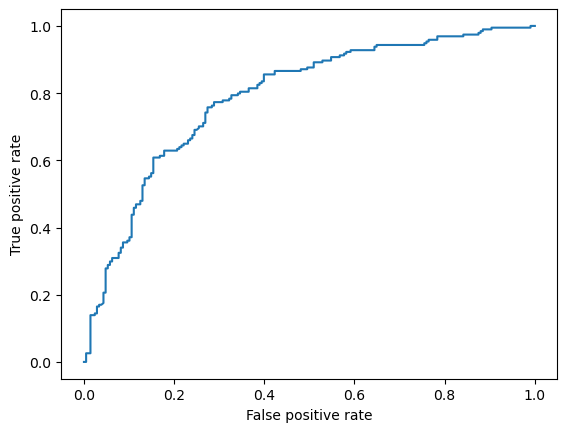

In [43]:
plt.plot(fpr,tpr);plt.xlabel("False positive rate"); plt.ylabel("True positive rate")

In [44]:
roc_auc_test = metrics.auc(fpr,tpr)

In [45]:
roc_auc_test

0.7896510705789057

### Prediction of Train data

In [46]:
train_pred = model.predict(train_data.iloc[:,1:])

#### Creating new column

In [47]:
train_data["train_pred"] = np.zeros(938)
train_data.loc[train_pred> optimal_threshold,"train_pred"]=1

## Confusion Matrix

In [48]:
confusion_matrix = pd.crosstab(train_data.train_pred, train_data.ATTORNEY)
confusion_matrix

ATTORNEY,0,1
train_pred,,
0.0,311,109
1.0,166,352


### Accuracy Text

In [49]:
accuracy_train = (311+352)/938
accuracy_train

0.7068230277185501

### Classification Report

In [50]:
classification_train = classification_report(train_data.train_pred,train_data.ATTORNEY)
classification_train

'              precision    recall  f1-score   support\n\n         0.0       0.65      0.74      0.69       420\n         1.0       0.76      0.68      0.72       518\n\n    accuracy                           0.71       938\n   macro avg       0.71      0.71      0.71       938\nweighted avg       0.71      0.71      0.71       938\n'

## ROC AUC Curve

In [51]:
roc_auc_train  = metrics.auc(fpr, tpr)

Text(0, 0.5, 'True positive rate')

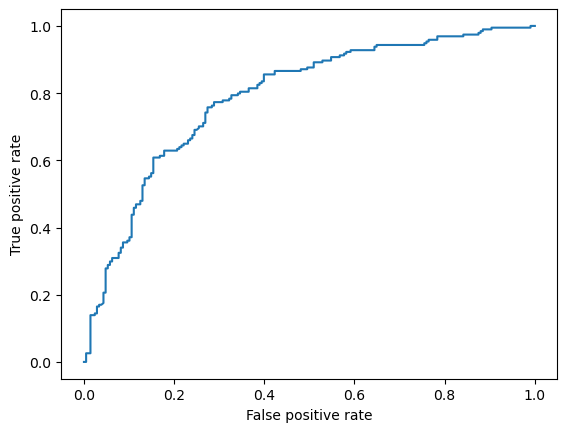

In [53]:
plt.plot(fpr, tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

# Thank You!!